In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Dataset_HVD/"

AS  data.csv  Dataset_Test  Dataset_Train  MR  MS  MVP	N


#Ekstraksi Fitur MFCC

In [ ]:
import librosa
audio_path1 = "/content/gdrive/My Drive/Dataset_HVD/Dataset_Test/Sinyal_AS/New_AS_001.wav"
audio_path2 = "/content/gdrive/My Drive/Dataset_HVD/Dataset_Test/Sinyal_MR/New_MR_001.wav"
x1 , sr = librosa.load(audio_path1)
x2 , sr = librosa.load(audio_path2)
print(type(x1), type(sr))
print(type(x2), type(sr))

<class 'numpy.ndarray'> <class 'int'>
<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_path1, sr=8000)
librosa.load(audio_path2, sr=8000)

(array([ 0.01339722,  0.01080322,  0.00772095, ..., -0.00857544,
        -0.00769043, -0.00686646], dtype=float32), 8000)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path1)#as

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path2)#MR

Text(0.5, 1.0, 'Sinyal AS')

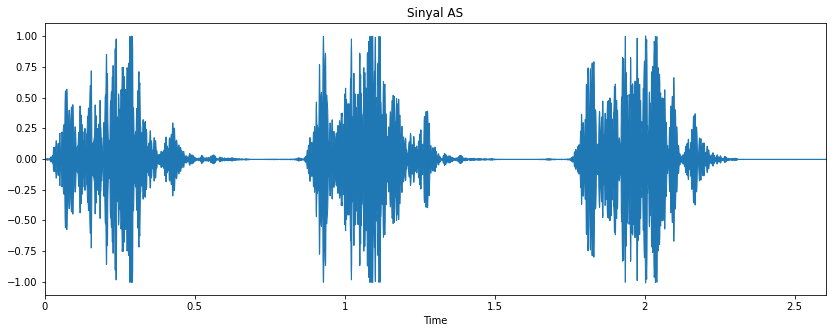

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x1, sr=sr) 
plt.title('Sinyal AS')

Text(0.5, 1.0, 'Sinyal MR')

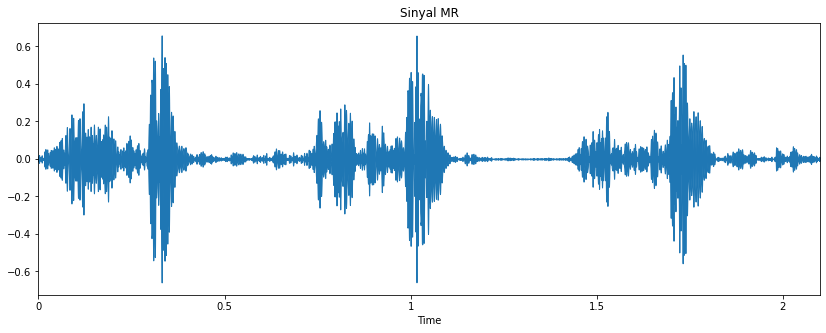

In [ ]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr=sr) 
plt.title('Sinyal MR')


Text(0.5, 1.0, 'Sinyal AS')

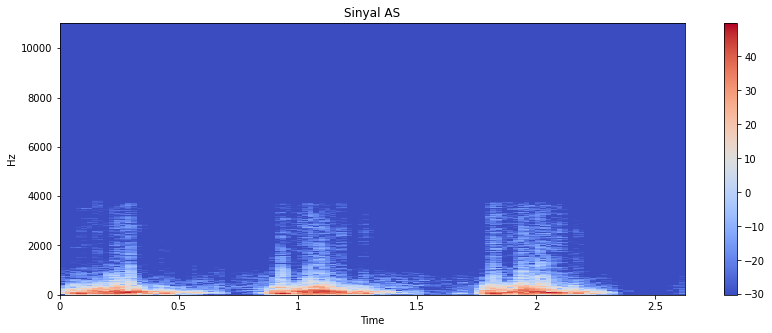

In [ ]:
#display Spectrogram
X = librosa.stft(x1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Sinyal AS')

Text(0.5, 1.0, 'Sinyal MR')

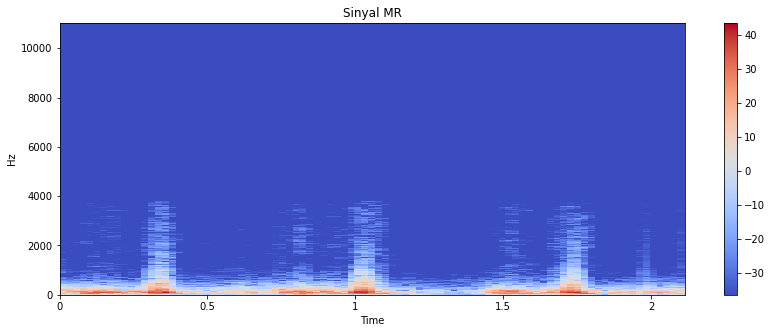

In [ ]:
#display Spectrogram
X = librosa.stft(x2)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('Sinyal MR')

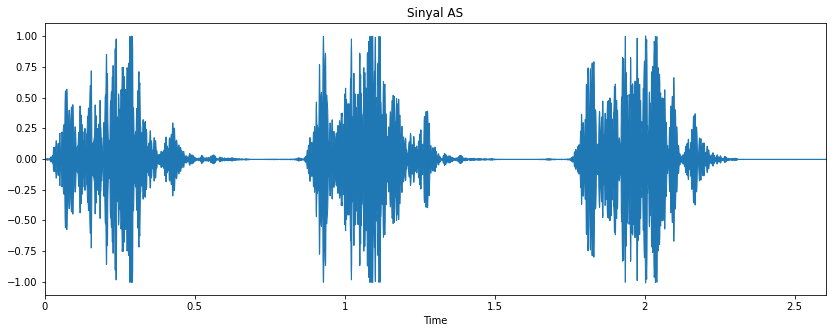

In [ ]:
x1, sr = librosa.load(audio_path1)
#Plot the signal:
plt.figure(figsize=(14, 5))
plt.title('Sinyal AS')
librosa.display.waveplot(x1, sr=sr)

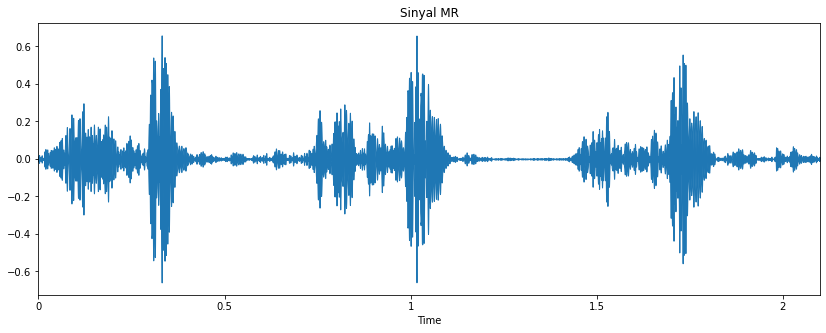

In [ ]:
x2, sr = librosa.load(audio_path2)
#Plot the signal:
plt.figure(figsize=(14, 5))
plt.title('Sinyal MR')
librosa.display.waveplot(x2, sr=sr)

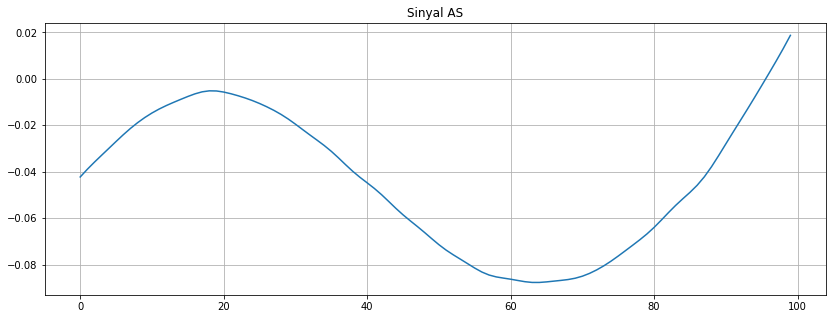

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x1[n0:n1])
plt.title('Sinyal AS')
plt.grid()

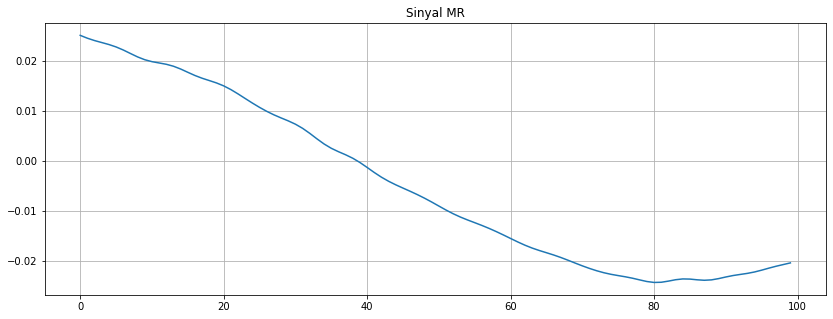

In [ ]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x2[n0:n1])
plt.title('Sinyal MR')
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(x1[n0:n1], pad=False) #sinyal as
print(sum(zero_crossings))

1


In [ ]:
zero_crossings = librosa.zero_crossings(x2[n0:n1], pad=False) #sinyal MR

Text(0.5, 1.0, 'Sinyal AS')

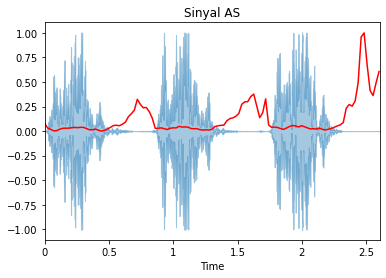

In [ ]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x1, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x1, axis=0):
    return sklearn.preprocessing.minmax_scale(x1, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x1, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Sinyal AS')

Text(0.5, 1.0, 'Sinyal MR')

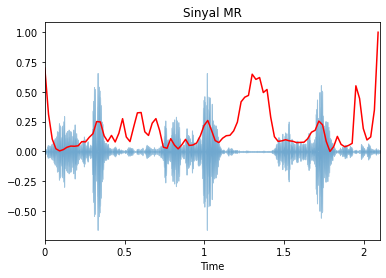

In [ ]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x2, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x2, axis=0):
    return sklearn.preprocessing.minmax_scale(x2, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x2, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Sinyal MR')

(20, 113)


Text(0.5, 1.0, 'Sinyal AS')

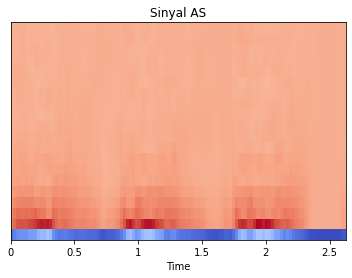

In [ ]:
mfccs = librosa.feature.mfcc(x1, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title('Sinyal AS')

(20, 91)


Text(0.5, 1.0, 'Sinyal MR')

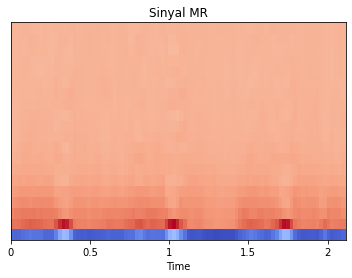

In [ ]:
mfccs = librosa.feature.mfcc(x2, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.title('Sinyal MR')

#Membuat dataset

ekstraksi fitur kita akan mendapatkan 20 mfcc untuk sampling rate yang diberikan karena dihitung untuk setiap frame sehingga mfcc memiliki 20 kolom.

In [ ]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

Membuat dataset CSV

In [ ]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'AS MR MVP N MS'.split()
for g in genres:
    for filename in os.listdir(f'/content/gdrive/My Drive/Dataset_HVD/{g}'):
        songname = f'/content/gdrive/My Drive/Dataset_HVD/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=2)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

menghitung semua fitur menggunakan paket librosa dan telah membuat kumpulan data dengan nama file data.csv dan telah memasukkan semua nilai fitur dari Jenis penyakit VHD yang diberikan di header yang diberikan.

Membaca dataset

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,New_AS_001.wav,0.536371,0.175242,277.918521,388.635144,414.947299,0.015805,-386.754303,116.028824,66.857605,49.906044,32.440632,14.465446,12.780771,11.384990,5.182719,4.231492,2.527633,-0.569629,0.103432,-0.384148,-1.938307,-1.460667,-1.788319,-1.912709,-1.356016,-2.470742,AS
1,New_AS_002.wav,0.523171,0.189884,321.933110,422.271902,509.866649,0.029650,-381.199860,111.803932,58.037422,46.383232,34.110512,15.541072,13.995121,11.054959,3.073349,3.688046,3.452070,0.244746,0.300158,-1.625167,-3.294237,-1.593342,-2.071534,-2.238627,-1.053707,-2.859260,AS
2,New_AS_003.wav,0.530126,0.187844,321.921064,421.575177,500.461342,0.028943,-383.972961,113.321007,58.228203,46.775322,33.523521,14.605481,14.332269,11.924363,3.909247,4.578588,3.462184,-0.698985,-0.186844,-1.137250,-2.718352,-1.968263,-2.938580,-2.267790,-0.649558,-2.868670,AS
3,New_AS_004.wav,0.547564,0.178826,333.709683,429.163236,543.775256,0.031884,-387.766968,108.425117,57.771317,45.804470,33.217716,14.964426,13.588378,11.368601,3.707098,3.753525,2.928567,-0.592711,-0.020229,-0.743535,-2.261272,-1.361820,-1.750521,-1.303864,-0.065107,-1.981946,AS
4,New_AS_005.wav,0.532340,0.173078,347.384279,458.684249,559.615773,0.030947,-391.369659,107.854607,57.150333,46.973309,32.523991,13.576580,13.532000,12.454810,4.640613,4.405294,3.526450,-0.343600,-0.044355,-0.669453,-2.394852,-1.719655,-1.914784,-1.841064,-1.383736,-2.948227,AS


Drop data yang tidak berguna dimana "filename" merupakan data yang harus di drop

In [ ]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.536371,0.175242,277.918521,388.635144,414.947299,0.015805,-386.754303,116.028824,66.857605,49.906044,32.440632,14.465446,12.780771,11.384990,5.182719,4.231492,2.527633,-0.569629,0.103432,-0.384148,-1.938307,-1.460667,-1.788319,-1.912709,-1.356016,-2.470742,AS
1,0.523171,0.189884,321.933110,422.271902,509.866649,0.029650,-381.199860,111.803932,58.037422,46.383232,34.110512,15.541072,13.995121,11.054959,3.073349,3.688046,3.452070,0.244746,0.300158,-1.625167,-3.294237,-1.593342,-2.071534,-2.238627,-1.053707,-2.859260,AS
2,0.530126,0.187844,321.921064,421.575177,500.461342,0.028943,-383.972961,113.321007,58.228203,46.775322,33.523521,14.605481,14.332269,11.924363,3.909247,4.578588,3.462184,-0.698985,-0.186844,-1.137250,-2.718352,-1.968263,-2.938580,-2.267790,-0.649558,-2.868670,AS
3,0.547564,0.178826,333.709683,429.163236,543.775256,0.031884,-387.766968,108.425117,57.771317,45.804470,33.217716,14.964426,13.588378,11.368601,3.707098,3.753525,2.928567,-0.592711,-0.020229,-0.743535,-2.261272,-1.361820,-1.750521,-1.303864,-0.065107,-1.981946,AS
4,0.532340,0.173078,347.384279,458.684249,559.615773,0.030947,-391.369659,107.854607,57.150333,46.973309,32.523991,13.576580,13.532000,12.454810,4.640613,4.405294,3.526450,-0.343600,-0.044355,-0.669453,-2.394852,-1.719655,-1.914784,-1.841064,-1.383736,-2.948227,AS


Mengubah jenis penyakit menjadi integer

In [ ]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

Semua angka integer merepresentasikan jenis penyakit VHD

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

Dataset training dan test dibagi menjadi 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#Membuat model, testing, dan training

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
7/7 [==============================] - 1s 4ms/step - loss: 1.5200 - accuracy: 0.4210
Epoch 2/20
7/7 [==============================] - 0s 3ms/step - loss: 0.9903 - accuracy: 0.7783
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.8673
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 0.4979 - accuracy: 0.8952
Epoch 5/20
7/7 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.9165
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 0.2760 - accuracy: 0.9373
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 0.1968 - accuracy: 0.9445
Epoch 8/20
7/7 [==============================] - 0s 3ms/step - loss: 0.1480 - accuracy: 0.9708
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.1254 - accuracy: 0.9668
Epoch 10/20
7/7 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9885
Epoch 11/20
7/7 [======================

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

7/7 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9950
test_acc:  0.9950000047683716


In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred == 1) & (actual_pos)
    false_pos = (y_pred == 1) & (actual_neg)
    true_neg = (y_pred == 0) & (actual_neg)
    false_neg = (y_pred == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

Mendapatkan akurasi dengan model yang dapat memprediksi jenis penyakit yang diberikan berdasarkan fitur yang diekstraksi. Model ini mencapai akurasi ...dimana akurasi ini sudah sangat baik

In [ ]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

2

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred,)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N'])
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 1  0 39  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
Classification Report:
              precision    recall  f1-score   support

   Sinyal AS       0.98      1.00      0.99        40
   Sinyal MR       1.00      1.00      1.00        40
   Sinyal MS       1.00      0.97      0.99        40
  Sinyal MVP       1.00      1.00      1.00        40
    Sinyal N       1.00      1.00      1.00        40

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy: 0.995


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.995


In [ ]:
lol = X_test[:1]
lil = model.predict(lol)
np.argmax(lil)

2

In [ ]:
y_test[0:100]

array([2, 3, 2, 3, 0, 2, 4, 0, 1, 3, 2, 0, 1, 4, 1, 1, 1, 4, 3, 4, 0, 2,
       3, 1, 2, 1, 4, 0, 4, 3, 3, 2, 3, 3, 3, 2, 2, 0, 4, 2, 3, 1, 1, 3,
       1, 3, 3, 0, 3, 4, 0, 2, 4, 2, 1, 2, 4, 3, 3, 2, 0, 2, 1, 3, 0, 0,
       4, 2, 1, 1, 0, 4, 1, 1, 0, 4, 2, 3, 0, 0, 0, 3, 0, 0, 0, 1, 4, 3,
       4, 4, 3, 0, 4, 3, 2, 4, 0, 3, 1, 3])

In [ ]:
import tensorflow as tf
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpdjwz_k43/assets


INFO:tensorflow:Assets written to: /tmp/tmpdjwz_k43/assets


#SVM Classifier

##SVM tanpa tuning

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', random_state=0) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.96


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Precision: 0.96
Recall: 0.96


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.875
Specificity: 1.0
Accuracy: 0.96


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N'])
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[40  0  0  0  0]
 [ 3 35  0  2  0]
 [ 2  1 37  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
Classification Report:
              precision    recall  f1-score   support

   Sinyal AS       0.89      1.00      0.94        40
   Sinyal MR       0.97      0.88      0.92        40
   Sinyal MS       1.00      0.93      0.96        40
  Sinyal MVP       0.95      1.00      0.98        40
    Sinyal N       1.00      1.00      1.00        40

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

Accuracy: 0.96


##SVM TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.800, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.825, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.844, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.887, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.931, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.912, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.906, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.713, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
grid_predictions = grid.predict(X_test)

print(confusion_matrix(y_test, grid_predictions))  
# print classification report
print(classification_report(y_test, grid_predictions, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N']))
print("Accuracy : ",accuracy_score(y_test, grid_predictions))

[[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 1  0 39  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
              precision    recall  f1-score   support

   Sinyal AS       0.98      1.00      0.99        40
   Sinyal MR       1.00      1.00      1.00        40
   Sinyal MS       1.00      0.97      0.99        40
  Sinyal MVP       1.00      1.00      1.00        40
    Sinyal N       1.00      1.00      1.00        40

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Accuracy :  0.995


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, grid_predictions)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.995


#KNN Classifier

##Jika nilai N=8 (Parameter tuning)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N'])
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[40  0  0  0  0]
 [ 1 34  0  5  0]
 [ 1  1 36  1  1]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
Classification Report:
              precision    recall  f1-score   support

   Sinyal AS       0.95      1.00      0.98        40
   Sinyal MR       0.97      0.85      0.91        40
   Sinyal MS       1.00      0.90      0.95        40
  Sinyal MVP       0.87      1.00      0.93        40
    Sinyal N       0.98      1.00      0.99        40

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy: 0.95


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.85
Specificity: 1.0
Accuracy: 0.95


## Setelah di Tuning N = 4 (Parameter Tuning)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N'])
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[40  0  0  0  0]
 [ 0 40  0  0  0]
 [ 1  1 38  0  0]
 [ 0  0  0 40  0]
 [ 0  0  0  0 40]]
Classification Report:
              precision    recall  f1-score   support

   Sinyal AS       0.98      1.00      0.99        40
   Sinyal MR       0.98      1.00      0.99        40
   Sinyal MS       1.00      0.95      0.97        40
  Sinyal MVP       1.00      1.00      1.00        40
    Sinyal N       1.00      1.00      1.00        40

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Accuracy: 0.99


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 1.0
Specificity: 1.0
Accuracy: 0.99


#Naive Bayes

## Naive bayes tanpa tuning

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred, target_names=['Sinyal AS', 'Sinyal MR','Sinyal MS','Sinyal MVP','Sinyal N'])
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[37  0  0  3  0]
 [ 0 28  3  9  0]
 [ 1  0 26 12  1]
 [16  4  2 18  0]
 [ 0  0  1  0 39]]
Classification Report:
              precision    recall  f1-score   support

   Sinyal AS       0.69      0.93      0.79        40
   Sinyal MR       0.88      0.70      0.78        40
   Sinyal MS       0.81      0.65      0.72        40
  Sinyal MVP       0.43      0.45      0.44        40
    Sinyal N       0.97      0.97      0.97        40

    accuracy                           0.74       200
   macro avg       0.76      0.74      0.74       200
weighted avg       0.76      0.74      0.74       200

Accuracy: 0.74


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(y_test, y_pred)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.7
Specificity: 0.925
Accuracy: 0.74


## Naive Bayes Tuning